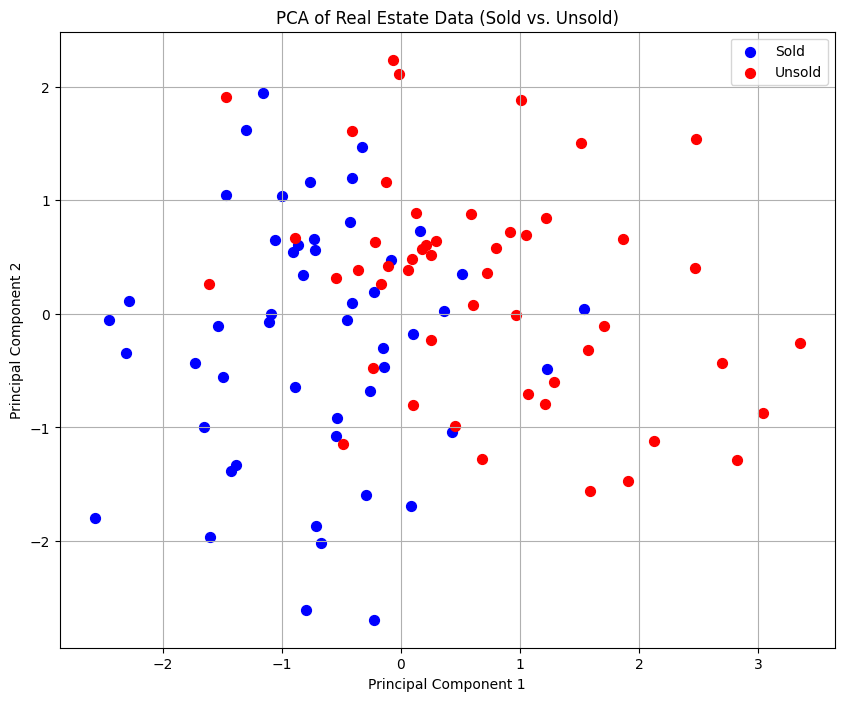

PCA Component Loadings:
                    PC1       PC2
price         -0.441760  0.507621
sq_ft         -0.433650  0.457734
age            0.582455  0.214752
crime_rate     0.399772  0.695255
school_rating -0.343110 -0.057464


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Create a sample dataset for Maggie
# We'll create data where 'Unsold' properties tend to be older,
# in areas with higher crime and lower school ratings.
np.random.seed(42) # for reproducible results
data = {
    'price': np.random.randint(200000, 800000, 100),
    'sq_ft': np.random.randint(1000, 3500, 100),
    'age': np.random.randint(1, 50, 100),
    'crime_rate': np.random.uniform(1, 10, 100),
    'school_rating': np.random.uniform(1, 10, 100),
    'status': ['Sold'] * 50 + ['Unsold'] * 50
}
df = pd.DataFrame(data)

# Make the 'Unsold' properties less desirable
df.loc[df['status'] == 'Unsold', 'age'] += 20
df.loc[df['status'] == 'Unsold', 'crime_rate'] += 3
df.loc[df['status'] == 'Unsold', 'school_rating'] -= 3
df.loc[df['status'] == 'Unsold', 'price'] -= 100000

# 2. Prepare the data
# Separate features (X) and the target (y)
X = df.drop('status', axis=1)
y = df['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
# Reduce the data to 2 principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and status
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['status'] = y

# 4. Visualize the results
plt.figure(figsize=(10, 8))
plt.title("PCA of Real Estate Data (Sold vs. Unsold)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a scatter plot, coloring points by their status
targets = ['Sold', 'Unsold']
colors = ['blue', 'red']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['status'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)

plt.legend(targets)
plt.grid()
plt.show()

# Optional: See what defines the principal components
print("PCA Component Loadings:")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)